# Coursework 2 - Loan Default Probability 

## Introduction


In this report, we examine the modeling process for our predictive analysis, with a particular focus on Gradient Boosting. Through targeted feature engineering, we achieved significant improvements in performance metrics, establishing Gradient Boosting as our top-performing algorithm.

Further refinement through feature selection resulted in enhanced accuracy and a final **AUC score of 0.96**, underscoring the critical role of identifying and retaining key features. However, the application of Principal Component Analysis (PCA) posed challenges, as it inadvertently reduced model performance by eliminating essential predictive information.

This report highlights the iterative journey of optimizing model performance through strategic feature engineering and selection.

In [147]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Overview

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
        * [3.2.1.  Features elimination by significant missing values ](#2.2.1)
        * [3.2.2.  Features elimination based on the intutiveness](#2.2.2)
        * [3.2.3.  Features elimination based on the correlation](#2.2.3)   
* [4. Feature Engineering and Exploratory Analysis](#3)
    * [4.1 Feature Analysis and Exploration](#3.1)
        * [4.1.1. Analysing the categorical features](#3.1.1)
        * [4.1.2  Analysing the continuous features ](#3.1.2) 
    * [4.2.Sampling Data](#3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Creating a framework for the model testing](#4.1)
        * [5.1.1. Creating the model constructor class](#4.1.1)
        * [5.1.2. Creating the model comparator class](#4.1.2)
    * [5.2. Find the best model](#4.2)
        * [5.2.1. Compare models](#4.2.1)
        * [5.2.2. Adding features based on existing features](#4.2.2)
        * [5.2.3. Feature selection](#4.2.2)
* [6.Results on the Test Dataset and Suggestions](#5)        
    * [6.1. Results on the Test Dataset](#5.1)
    * [6.2. Ideas to improve the model](#5.2)
* [7.Conclusion](#6) 

<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. You want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [149]:
# Load the zipped CSV file with utf-8 encoding
df = pd.read_csv('LoansData_sample.csv.gz', compression='gzip', encoding='utf-8')
df.head()

# Set the first column as the index
df.set_index(df.columns[0], inplace=True)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


### The column to predict is loan_status. Look at the values it takes and their counts.

In [151]:
df['loan_status'].value_counts()

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

In [152]:
# Filter the dataset to keep only the loans with status "Fully Paid" or "Charged Off"
filtered_df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
# print(filtered_df)

# Count the number of each status
status_counts = filtered_df['loan_status'].value_counts()
print(status_counts)

Fully Paid     69982
Charged Off    16156
Name: loan_status, dtype: int64


We can clearly see that the data is imbalanced.

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

In [153]:
nan_counts = filtered_df.isnull().sum()
nan_counts_filtered = nan_counts/filtered_df.shape[0]>0.7
nan_counts_filtered = nan_counts_filtered[nan_counts_filtered==True]
nan_counts_filtered

member_id                                     True
desc                                          True
mths_since_last_record                        True
next_pymnt_d                                  True
mths_since_last_major_derog                   True
annual_inc_joint                              True
dti_joint                                     True
verification_status_joint                     True
open_acc_6m                                   True
open_act_il                                   True
open_il_12m                                   True
open_il_24m                                   True
mths_since_rcnt_il                            True
total_bal_il                                  True
il_util                                       True
open_rv_12m                                   True
open_rv_24m                                   True
max_bal_bc                                    True
all_util                                      True
inq_fi                         

### Drop the columns with more than 30% of missing data.

In [154]:
filtered_df.drop(nan_counts_filtered.index, axis=1, inplace=True)

### How large is the remaining dataset ?

In [155]:
filtered_df.shape

(86138, 94)

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intutiveness

In [156]:
keep_list = ['charged_off','funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]

In [157]:
filtered_df = filtered_df[filtered_df.columns.intersection(keep_list)]

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

### Set the labels to be 1 for Charged off else 0

In [159]:
# Set the labels to be 1 for "Charged Off" and 0 for "Fully Paid"
filtered_df['target'] = filtered_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
filtered_df.drop('loan_status', axis=1, inplace=True)

### Now remove all of the features with a correlation of under 3% with the  charge-off label. List the names of the features you are removing.

In [160]:
correlation_with_target = filtered_df.corr()['target'].sort_values(ascending=False).abs()
bad_correlation_with_target = correlation_with_target[correlation_with_target<0.03]
filtered_df.drop(bad_correlation_with_target.index, axis=1, inplace=True)

<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

In [165]:
processed_df = filtered_df.copy()

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features 

### List the categorical features and take a decision on what to do with them - drop them or process them. Explain your decisions.

In [166]:
# Select non-numeric features
non_numeric_features = filtered_df.select_dtypes(include=['object']).columns

# Display the number of categories for each non-numeric feature
for feature in non_numeric_features:
    print(f"{feature}: {filtered_df[feature].nunique()} categories")

term: 2 categories
grade: 7 categories
sub_grade: 35 categories
emp_title: 32987 categories
emp_length: 11 categories
home_ownership: 4 categories
verification_status: 3 categories
purpose: 13 categories
title: 20 categories
zip_code: 846 categories
addr_state: 46 categories
earliest_cr_line: 598 categories
initial_list_status: 2 categories
application_type: 1 categories


In [167]:
processed_df['term'] = filtered_df['term'].copy().apply(lambda row: 36 if row == ' 36 months' else 60)

### Is sub_grade worth keeping ?

yes more than grade because more information

In [168]:
# Define base values for each letter, where A is the highest and G is the lowest
letter_values = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

# Convert grades to a continuous numeric scale
def grade_to_continuous(grade):
    letter = grade[0]  # Extract the letter part
    number = int(grade[1])  # Extract the number part
    return letter_values[letter] * 5 - number  # Use a continuous scoring system

# Apply the function to the 'grade' column
processed_df['sub_grade'] = filtered_df['sub_grade'].copy().apply(grade_to_continuous)

# We can drop grade because we have sub_grade
processed_df.drop('grade', axis=1, inplace=True)
# processed_df[['sub_grade']]

### Decide if you want to do anything to emp_length

In [169]:
experience_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 12
}   

# Apply the function to the 'grade' column
processed_df['emp_length'] = filtered_df['emp_length'].copy().map(experience_mapping)

In [170]:
processed_df['initial_list_status'] = np.where(filtered_df['initial_list_status'] == 'w', 0, 1)

In [171]:
processed_df_test = processed_df[['purpose', 'title']]
processed_df_test['mix'] = processed_df_test.apply(lambda x: f"{x['purpose']} {x['title']}", axis=1)

In [172]:
# We can see some data error, so we will keep the more reliable one which is purpose because standardized data compared to title
processed_df.drop(['title'], axis=1, inplace=True)

In [173]:
zip_code_freq = filtered_df['zip_code'].str[:3].value_counts().to_dict()
job_title_frequenct = filtered_df['emp_title'].value_counts().to_dict()

# Map each ZIP code to its frequency
processed_df['zip_code'] = filtered_df['zip_code'].copy().str[:3].map(zip_code_freq)
processed_df['emp_title'] = filtered_df['emp_title'].copy().map(job_title_frequenct)

In [174]:
filtered_df['earliest_cr_line_date'] = pd.to_datetime(filtered_df['earliest_cr_line'], format='%b-%Y')

# Find the oldest and the most recent dates in the column
min_date = filtered_df['earliest_cr_line_date'].min()
max_date = filtered_df['earliest_cr_line_date'].max()

# Calculate the numeric difference in days from the minimum date
processed_df['earliest_cr_line'] = round((filtered_df['earliest_cr_line_date'] - min_date).dt.days / 365, 1)

processed_df[['earliest_cr_line']].head()

,earliest_cr_line
Unnamed: 0,
0,39.8
1,34.9
2,48.8
4,47.8
5,38.0


In [175]:
processed_df.drop('application_type', axis=1, inplace=True)
processed_df.drop('addr_state', axis=1, inplace=True)


We will apply one-hot encoding to remaining columns.

In [176]:
processed_df = pd.get_dummies(processed_df, columns=['home_ownership', 'verification_status', 'purpose'], drop_first=True)

We check if all categories are handled

In [177]:
# Select non-numeric features
non_numeric_features = processed_df.select_dtypes(include=['object']).columns

# Display the number of categories for each non-numeric feature
for feature in non_numeric_features:
    print(f"{feature}: {processed_df[feature].nunique()} categories")

<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features 

In [178]:
# Summary statistics for all numerical columns
numerical_summary = filtered_df.select_dtypes(include='number').describe()
print(numerical_summary)

          loan_amnt   funded_amnt      int_rate   installment    annual_inc  \
count  86138.000000  86138.000000  86138.000000  86138.000000  8.613800e+04   
mean   14106.526446  14106.526446     13.002360    430.737187  7.384311e+04   
std     8391.139221   8391.139221      4.397419    251.653139  5.929352e+04   
min     1000.000000   1000.000000      6.000000     30.420000  4.000000e+03   
25%     7800.000000   7800.000000      9.490000    248.480000  4.500000e+04   
50%    12000.000000  12000.000000     12.990000    370.480000  6.247372e+04   
75%    20000.000000  20000.000000     15.610000    568.005000  9.000000e+04   
max    35000.000000  35000.000000     26.060000   1408.130000  7.500000e+06   

                dti  fico_range_low  fico_range_high      open_acc  \
count  86138.000000    86138.000000     86138.000000  86138.000000   
mean      18.532747      692.462966       696.463024     11.746453   
std        8.538247       29.731549        29.731848      5.433122   
min     

In [179]:
filtered_df.select_dtypes(include='number').head()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,revol_util,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,target
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,15000.0,15000.0,12.39,336.64,78000.0,12.03,750.0,754.0,6.0,29.0,12017.81,5.0,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0,0
1,10400.0,10400.0,6.99,321.08,58000.0,14.92,710.0,714.0,17.0,31.6,321.08,7.0,9536.0,7599.0,41.5,290.0,1.0,1.0,9.0,1
2,21425.0,21425.0,15.59,516.36,63800.0,18.49,685.0,689.0,10.0,76.2,17813.19,4.0,4232.0,324.0,97.8,136.0,7.0,0.0,4.0,0
4,7650.0,7650.0,13.66,260.20,50000.0,34.81,685.0,689.0,11.0,91.9,17.70,6.0,5857.0,332.0,93.2,148.0,8.0,0.0,4.0,1
5,9600.0,9600.0,13.66,326.53,69000.0,25.81,680.0,684.0,12.0,59.4,9338.58,8.0,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0,0


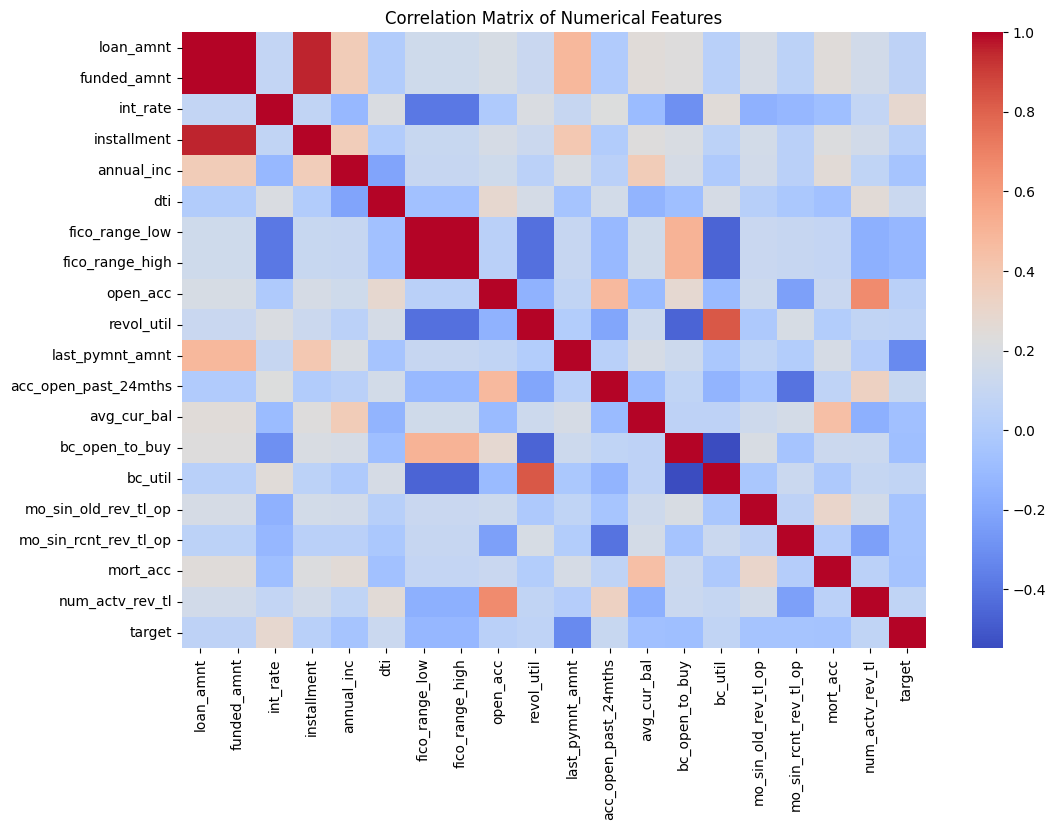

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and display the correlation matrix
correlation_matrix = filtered_df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [181]:
processed_df['annual_inc'] = filtered_df['annual_inc'].copy()/1000

In [182]:
processed_df['fico_spread'] = filtered_df['fico_range_low'].copy() - filtered_df['fico_range_high'].copy()
processed_df.drop(['fico_range_high'], axis=1, inplace=True)

<a id='3.4'></a>
## 4.2. Sampling Data

In [184]:
nan_counts = processed_df.isna().sum()
print(nan_counts[nan_counts > 0])

emp_title         4722
emp_length        4717
revol_util          44
bc_open_to_buy     996
bc_util           1049
dtype: int64


In [185]:
# Fill NaN in numerical columns with median
columns_to_fill_median = [
    'annual_inc', 
    'dti', 
    'fico_range_low', 
    'bc_open_to_buy',
    'emp_length',
    'emp_title',
    'bc_util',     
    'revol_util',      
    ]

# Loop through each column and fill NaN values with the median
for col in columns_to_fill_median:
    processed_df[col].fillna(processed_df[col].median(), inplace=True)

# Fill NaN in time-based columns
processed_df['earliest_cr_line'].fillna(method='ffill', inplace=True)
nan_counts = processed_df.isna().sum()

In [47]:
balanced_df = processed_df.groupby('target').sample(n=5500, random_state=42).reset_index(drop=True)
print(balanced_df['target'].value_counts())

0    5500
1    5500
Name: target, dtype: int64


In [48]:
nan_counts = balanced_df.isna().sum()
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='3.4'></a>
## 5.1. Creating a framework for the model testing

<a id='3.4'></a>
### 5.1.1 Creating a model constructor


The primary objective of the createPipeline class is to facilitate the construction of a tailored pipeline for each model we want to test, complete with its specific parameters. This flexibility is achieved through the use of a dictionary named configs, which allows us to easily adjust the configurations for each model.

The pipeline starts by initializing with a StandardScaler to normalize the input features, ensuring that they are appropriately scaled for the models. This normalization step is crucial as it can significantly impact the performance of many machine learning algorithms. Additionally, the option to apply PCA (Principal Component Analysis) can be included, which allows for dimensionality reduction if desired.

By incorporating these steps, the createPipeline class not only streamlines the model testing process but also ensures that we have a standardized way to handle data preprocessing and model evaluation. The ability to set parameters dynamically further enhances this flexibility, allowing us to fine-tune each model’s performance based on the specified configurations. 

In [77]:
from IPython.display import clear_output
clear_output(wait=False)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

class createPipeline:
    def __init__(self, model, params_search, composing_models=None, apply_pca = False):
        # Initialize `estimator_params` with `estimators` if `composing_models` are provided
        estimator_params = {}
        
        if composing_models:
            # Set `estimators` for VotingClassifier with provided composing models
            estimator_params = {'estimators': composing_models}
            # Set the main `params_search` for each model in composing_models
            for (name, clf) in composing_models:
                # Retrieve each composing model's configuration if it exists in `configs`
                if name in configs:
                    model_params = configs[name].params_search
                    # Prefix each parameter with model name and add to `params_search` and take whats after model__
                    for param_key, param_val in model_params.items():
                        param_key = param_key.split('model__', 1)[-1]
                        params_search[f'model__{name}__{param_key}'] = param_val
        
        # Initialize the attributes
        self.model_class = model 
        self.params_search = params_search
        
        # Construct the pipeline with optional PCA step
        pipeline_steps = [('scaler', StandardScaler())]
        
        if apply_pca:
            pipeline_steps.append(('pca', PCA()))
        
        # Add the model step
        pipeline_steps.append(('model', model(**estimator_params)))
        
        # Create the pipeline
        self.model = Pipeline(pipeline_steps)
        
    def set_params(self, **params):
        self.model = self.model.set_params(**params)


In [78]:
# Importing all classifiers, ensemble methods, and related components
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from ray import tune

configs = {
    'logistic_regression': createPipeline(
        LogisticRegression,
        {
            'model__penalty': tune.choice(['l2', 'l1']),
            'model__C': tune.uniform(0.1, 5),
            'model__solver': tune.choice(['liblinear']),
            'model__random_state': tune.choice([42]),
        }
    ),
    'xgboost': createPipeline(
        XGBClassifier,
        {
            'model__n_estimators': tune.qrandint(50, 600, 50),
            'model__max_depth': tune.randint(1, 15),
            'model__learning_rate': tune.uniform(0.01, 0.5),
            'model__subsample': tune.uniform(0.5, 1.0),
            'model__colsample_bytree': tune.uniform(0.3, 1.0),
            'model__gamma': tune.uniform(0, 5),
            'model__min_child_weight': tune.qrandint(1, 10, 1),
            'model__random_state': tune.choice([42]),
        }
    ),
    'random_forest': createPipeline(
        RandomForestClassifier,
        {
            'model__n_estimators': tune.randint(50, 300),
            'model__max_depth': tune.randint(10, 50),
            'model__min_samples_split': tune.randint(2, 10),
            'model__min_samples_leaf': tune.randint(1, 10),
            'model__max_features': tune.choice(['sqrt', 'log2', None]),
            'model__random_state': tune.choice([42]),
        }
    ),
    # Parameters adapted from the model evaluation test
    'svc': createPipeline(
        SVC,
        {
            'model__C': tune.uniform(0.1, 2),
            'model__kernel': tune.choice(['linear']),
            'model__gamma': tune.choice(['scale', 'auto']),
            'model__random_state': tune.choice([42]),
        }
    ),
    'knn': createPipeline(
        KNeighborsClassifier,
        {
            'model__n_neighbors': tune.randint(1, 20),
            'model__weights': tune.choice(['uniform', 'distance']),
            'model__algorithm': tune.choice(['auto', 'ball_tree', 'kd_tree', 'brute']),
            'model__leaf_size': tune.randint(10, 50)
        }
    ),
    'gradient_boosting': createPipeline(
        GradientBoostingClassifier,
        {
            'model__n_estimators': tune.qrandint(50, 500, 10),
            'model__learning_rate': tune.loguniform(1e-4, 0.3),
            'model__max_depth': tune.randint(3, 10),
            'model__subsample': tune.uniform(0.5, 1.0),
            'model__random_state': tune.choice([42]),
        }
    ),  
    'gradient_boosting PCA': createPipeline(
        GradientBoostingClassifier,
        {
            'model__n_estimators': tune.qrandint(50, 500, 10),
            'model__learning_rate': tune.loguniform(1e-4, 0.3),
            'model__max_depth': tune.randint(3, 10),
            'model__subsample': tune.uniform(0.5, 1.0),
            'model__random_state': tune.choice([42]),
        },
        apply_pca = True
    ),  
    'adaboost': createPipeline(
        AdaBoostClassifier,
        {
            'model__n_estimators': tune.randint(50, 500),
            'model__learning_rate': tune.uniform(0.01, 1),
            'model__random_state': tune.choice([42]),
        }
    ),
    'gaussian_nb': createPipeline(
        GaussianNB,
        {}
    ),
    
    'mlp': createPipeline(
        MLPClassifier,
        {
            'model__hidden_layer_sizes': tune.choice([(50,), (100,), (50, 50), (100, 50)]),
            'model__activation': tune.choice(['relu', 'tanh']),
            'model__learning_rate_init': tune.loguniform(1e-4, 1e-2),
            'model__max_iter': tune.choice([200, 300, 400]),
            'model__random_state': tune.choice([42]),
        }
    )
}

# Add combinations with VotingClassifier
configs.update({
    'random_forest + xgboost + gradient_boosting': createPipeline(
        VotingClassifier, 
        {
            'model__voting': tune.choice(['hard', 'soft']),
            'model__weights': tune.choice([[1, 1, 1], 
                                           [0, 0, 1], [0, 0, 1], [0, 1, 0], 
                                           [0, 1, 1], [1, 0, 1], [1, 1, 0], 
                                           [0, 1, 2], [1, 0, 2], [2, 1, 0],
                                           [2, 1, 1], [1, 2, 1], [1, 1, 2], 
                                           [2, 2, 1], [2, 1, 2], [1, 2, 2]]),
        }, 
        [
            ('random_forest', RandomForestClassifier()),
            ('xgboost', XGBClassifier()),
            ('gradient_boosting', GradientBoostingClassifier())
        ]
    ),
})


<a id='3.4'></a>
### 5.1.2 Creating the model comparator class

The main purpose of this class is to take data and a list of pipelines (created using our pipeline creator) and to evaluate each one sequentially. Initially, the data is split using train_test_split, reserving a test set for final evaluation.

We then use the ray[tune] package, which includes a powerful hyperparameter optimization tool, Optuna. This allows us to efficiently search for the best hyperparameters. The number of folds for cross-validation (k-fold) can be set according to preference, providing flexibility in the validation process. As we are using classifiers, we use the roc_auc_score to fit the hyperparameter optimization.

Once the function identifies the optimal parameters for a given model, it evaluates the model on the reserved test set and stores the results in a DataFrame for easy comparison and analysis.

In [ ]:
from tune_sklearn import TuneSearchCV

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split
import time

class modelComparator:
    def __init__(self, df: pd.DataFrame):
        # Initialize with the input DataFrame and perform train-test split
        self.dataframe = df
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42, stratify=df['target']
        )
        self.metrics_dict = {}  # Dictionary to store evaluation metrics

    # The function to perform cross-validation and hyperparameter search
    def performCV(self, config, kfold, n_trials):
        # If no hyperparameters to search, directly fit the model
        if not config.params_search:
            modelCV = config.model
            modelCV.fit(self.X_train, self.y_train)
            self.best_params = {}  # No hyperparameters were optimized
        else:
            # Use TuneSearchCV with Optuna for hyperparameter tuning
            modelCV = TuneSearchCV(
                config.model,
                config.params_search, 
                search_optimization="optuna", 
                scoring=make_scorer(roc_auc_score),
                cv=kfold,
                verbose=0,
                n_jobs=-1,
                n_trials=n_trials,
                # max_iters=1500
            )
            modelCV.fit(self.X_train, self.y_train)
            self.best_params = modelCV.best_params_  # Save best hyperparameters found

    # The function to perform the test
    def performTest(self, config, kfold, n_trials):
        # Perform cross-validation and hyperparameter search
        self.performCV(config, kfold, n_trials)
        
        # Set up and retrain the best model with optimized parameters
        self.best_model = config.model
        self.best_model.set_params(**self.best_params)
        self.best_model.fit(self.X_train, self.y_train)
        
        # Make predictions on the test set
        self.y_pred = self.best_model.predict(self.X_test)


        # Calculate and store evaluation metrics
        recall = recall_score(self.y_test, self.y_pred)
        precision = precision_score(self.y_test, self.y_pred)
        accuracy = accuracy_score(self.y_test, self.y_pred)
        f1 = f1_score(self.y_test, self.y_pred)
        auc_roc = roc_auc_score(self.y_test, self.y_pred)

        # Add metrics to the dictionary for output
        self.metrics_dict = {
            'Best Params': self.best_params,
            'Recall': recall,
            'Precision': precision,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'AUC ROC': auc_roc
        }
    
    # The function to compare multiple models     
    def compare_models(self, configs_list: list, kfolds: int = 5, n_trials: int = 10):
        results_df = pd.DataFrame()  # DataFrame to store results for each model
        
        for model_name in configs_list:
            print(f"Testing model: {model_name}")
            try:
                # Measure model evaluation time
                start_time = time.time()
                
                # Retrieve the specific model configuration
                config = configs[model_name]
                self.performTest(config, kfolds, n_trials)
                
                end_time = time.time()
                processing_time = end_time - start_time
                
                # Add model name and processing time to metrics
                self.metrics_dict['Model'] = model_name
                self.metrics_dict['Processing Time (s)'] = processing_time
                
                print(self.metrics_dict, flush=True)
                # Append metrics to results DataFrame
                results_df = results_df.append(self.metrics_dict, ignore_index=True)
            except Exception as e:
                print(f"Error testing model {model_name}: {e}")
        
        self.results_df = results_df  # Save the results as an attribute
        return self.results_df  # Return the results DataFrame for analysis


<a id='3.4'></a>
## 5.2 Find the best model


The output presented from the model comparator class is a DataFrame that summarizes the results of various machine learning models evaluated on the **test dataset**, derived from a train-test split of the original dataset. 

<a id='3.4'></a>
### 5.2.1 Compare models

In [52]:
model_to_test = ['logistic_regression', 'xgboost', 'random_forest', 'svc', 'knn', 'gradient_boosting', 'adaboost', 'gaussian_nb', 'mlp']

model_comparator = modelComparator(balanced_df)
model_comparator.compare_models(model_to_test, kfolds=10, n_trials=15)

(_Trainable pid=31040) c:\Users\Max\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
(_Trainable pid=31040)   warnings.warn(
(_Trainable pid=31040) c:\Users\Max\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet. [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_Trainable pid=31040)   warnings.warn( [repeated 3x across cluster]
(_Trainable pid=31040) c:\Users\Max\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_percep

{'Best Params': {'model__hidden_layer_sizes': (50,), 'model__activation': 'tanh', 'model__learning_rate_init': 0.00010508343241309304, 'model__max_iter': 400, 'model__random_state': 42}, 'Recall': 0.8654545454545455, 'Precision': 0.805414551607445, 'Accuracy': 0.8281818181818181, 'F1 Score': 0.834355828220859, 'AUC ROC': 0.8281818181818181, 'Model': 'mlp', 'Processing Time (s)': 715.7613227367401}


,Best Params,Recall,Precision,Accuracy,F1 Score,AUC ROC,Model,Processing Time (s)
0,"{'model__penalty': 'l2', 'model__C': 0.6293256...",0.882727,0.805141,0.834545,0.842151,0.834545,logistic_regression,75.809562
1,"{'model__n_estimators': 350, 'model__max_depth...",0.918182,0.826514,0.862727,0.869940,0.862727,xgboost,440.896909
2,"{'model__n_estimators': 260, 'model__max_depth...",0.931818,0.818037,0.862273,0.871228,0.862273,random_forest,665.633634
3,"{'model__C': 0.29936778064669933, 'model__kern...",0.916364,0.788116,0.835000,0.847415,0.835000,svc,295.360520
4,"{'model__n_neighbors': 17, 'model__weights': '...",0.740000,0.715290,0.722727,0.727435,0.722727,knn,54.230479
5,"{'model__n_estimators': 330, 'model__learning_...",0.938182,0.818398,0.865000,0.874206,0.865000,gradient_boosting,1108.063465
6,"{'model__n_estimators': 483, 'model__learning_...",0.917273,0.814366,0.854091,0.862762,0.854091,adaboost,292.416942
7,{},0.987273,0.660986,0.740455,0.791834,0.740455,gaussian_nb,0.048773
8,"{'model__hidden_layer_sizes': (50,), 'model__a...",0.865455,0.805415,0.828182,0.834356,0.828182,mlp,715.761323


The ConvergenceWarning occurred because my computer struggled to run the MLP model effectively, likely due to limited system resources or configuration issues. This prevented the optimizer from converging within the specified iteration limit.

In the model comparison, the gradient boosting model achieved the highest overall performance with an AUC ROC of 0.865, recall of 0.938, and an F1 score of 0.874, despite its longer processing time of 1108 seconds. The xgboost and random forest models also performed well, with AUC ROC scores of 0.8627 and 0.8623, respectively, showing strong predictive power. The logistic regression and SVC models had lower recall and AUC ROC values around 0.835, while KNN and Gaussian NB demonstrated significantly lower scores across metrics, indicating limited effectiveness.

<a id='3.4'></a>
### 5.2.2 Adding features based on existing features


To improve model performance, we will apply feature engineering based on the feature definitions outlined in the annex. This will involve creating new, meaningful features derived from the original ones to enhance the models' predictive power. 

In [195]:
new_feature_df = balanced_df.copy()

# Debt-to-Income Adjusted Ratio
new_feature_df['dti_adjusted'] = new_feature_df['dti'] + (new_feature_df['annual_inc'] / new_feature_df['annual_inc'].mean())

# Income-to-Loan Ratio
new_feature_df['income_to_loan'] = new_feature_df['annual_inc'] / new_feature_df['loan_amnt']

# Income per Installment
new_feature_df['income_per_installment'] = new_feature_df['annual_inc'] / new_feature_df['installment']

# Loan Amount Percentile
new_feature_df['loan_amount_percentile'] = pd.qcut(new_feature_df['loan_amnt'], 10, labels=False)

# Installment-to-Income Ratio
new_feature_df['installment_to_income'] = new_feature_df['installment'] / (new_feature_df['annual_inc'] / 12)

# Repayment Progress (assuming 'out_prncp' is available as outstanding principal)
new_feature_df['repayment_progress'] = 1 - (new_feature_df['last_pymnt_amnt'] / new_feature_df['loan_amnt'])


In [54]:
model_to_test = ['logistic_regression', 'xgboost', 'random_forest', 'svc', 'knn', 'gradient_boosting', 'adaboost', 'gaussian_nb']

model_comparator_new_feature = modelComparator(new_feature_df)
model_comparator_new_feature.compare_models(model_to_test, kfolds=10, n_trials=20)

{'Best Params': {'model__n_estimators': 422, 'model__learning_rate': 0.9972651065258422, 'model__random_state': 42}, 'Recall': 0.9118181818181819, 'Precision': 0.8407376362112322, 'Accuracy': 0.8695454545454545, 'F1 Score': 0.8748364587876145, 'AUC ROC': 0.8695454545454546, 'Model': 'adaboost', 'Processing Time (s)': 750.3844177722931}
Testing model: gaussian_nb
{'Best Params': {}, 'Recall': 0.9763636363636363, 'Precision': 0.7316076294277929, 'Accuracy': 0.8090909090909091, 'F1 Score': 0.8364485981308412, 'AUC ROC': 0.8090909090909091, 'Model': 'gaussian_nb', 'Processing Time (s)': 0.06664824485778809}


,Best Params,Recall,Precision,Accuracy,F1 Score,AUC ROC,Model,Processing Time (s)
0,"{'model__penalty': 'l1', 'model__C': 0.6175506...",0.909091,0.809061,0.847273,0.856164,0.847273,logistic_regression,98.933702
1,"{'model__n_estimators': 150, 'model__max_depth...",0.949091,0.923894,0.935455,0.936323,0.935455,xgboost,691.017723
2,"{'model__n_estimators': 257, 'model__max_depth...",0.946364,0.903646,0.922727,0.924512,0.922727,random_forest,1451.703299
3,"{'model__C': 1.0604013288481728, 'model__kerne...",0.938182,0.793846,0.847273,0.860000,0.847273,svc,535.395427
4,"{'model__n_neighbors': 18, 'model__weights': '...",0.804545,0.748731,0.767273,0.775635,0.767273,knn,82.075173
5,"{'model__n_estimators': 490, 'model__learning_...",0.954545,0.933333,0.943182,0.943820,0.943182,gradient_boosting,2610.128575
6,"{'model__n_estimators': 422, 'model__learning_...",0.911818,0.840738,0.869545,0.874836,0.869545,adaboost,750.384418
7,{},0.976364,0.731608,0.809091,0.836449,0.809091,gaussian_nb,0.066648


After feature engineering, the AUC ROC scores improved for all models, particularly boosting algorithms. Gradient Boosting’s AUC ROC jumped significantly from 0.865 to 0.943, indicating a much stronger ability to distinguish between classes. This improvement highlights how feature engineering added valuable information that allowed Gradient Boosting to capture complex patterns more effectively.

Other models, like XGBoost and Random Forest, also saw notable AUC ROC increases (from 0.862 to 0.935 and 0.862 to 0.923, respectively). However, Gradient Boosting now outperforms the rest, suggesting that it best leverages the enriched feature set for classification tasks, underscoring the value of feature engineering in enhancing model performance.

<a id='3.4'></a>
### 5.2.3 Feature Selection

Because Gradient Boosting is the most effficient we will focuse our attention on this model.

In [55]:
model_to_test = ['gradient_boosting']

model_comparator_best_param = modelComparator(new_feature_df)
model_comparator_best_param.compare_models(model_to_test, kfolds=10, n_trials=20)

{'Best Params': {'model__n_estimators': 440, 'model__learning_rate': 0.06744745657380416, 'model__max_depth': 8, 'model__subsample': 0.703439776148994, 'model__random_state': 42}, 'Recall': 0.96, 'Precision': 0.9287598944591029, 'Accuracy': 0.9431818181818182, 'F1 Score': 0.9441215914170765, 'AUC ROC': 0.9431818181818182, 'Model': 'gradient_boosting', 'Processing Time (s)': 2977.4056358337402}


,Best Params,Recall,Precision,Accuracy,F1 Score,AUC ROC,Model,Processing Time (s)
0,"{'model__n_estimators': 440, 'model__learning_...",0.96,0.92876,0.943182,0.944122,0.943182,gradient_boosting,2977.405636


Next, we’ll examine the feature importance scores to identify the most influential features in our models. By selecting only the features with an importance score above 1%, we can refine the dataset, focusing on the most predictive elements. This targeted feature selection aims to enhance model efficiency by reducing noise and potentially improving performance, as the model will now learn from a more relevant and concise set of features. 

Number of features initially: 60
Number of features after selection: 8


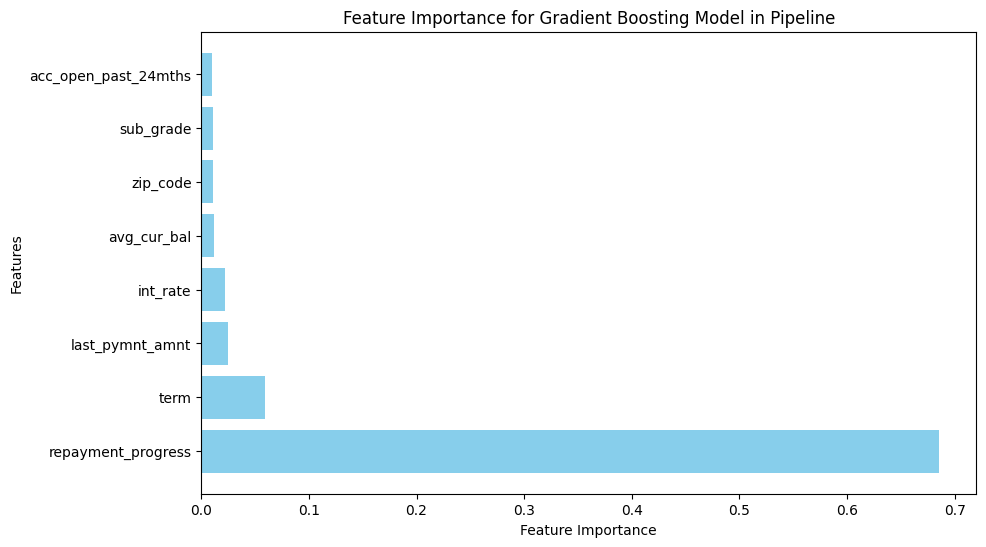

In [56]:
# Access the Gradient Boosting model from the pipeline
gradient_boosting_model = model_comparator_best_param.best_model.named_steps['model']

# Get the feature importances and feature names
importances = gradient_boosting_model.feature_importances_
feature_names = model_comparator_best_param.X_train.columns

# Create a DataFrame for easy sorting and filtering
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Filter for the top features
filtered_feature_importance = importance_df[importance_df['Importance'] > 0.01].set_index('Feature')['Importance'].to_dict()

print(f'Number of features initially: {importance_df.shape[0]}')
print(f'Number of features after selection: {len(filtered_feature_importance)}')

# Plot the filtered feature importance
plt.figure(figsize=(10, 6))
plt.barh(list(filtered_feature_importance.keys()), list(filtered_feature_importance.values()), color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Gradient Boosting Model in Pipeline")
plt.show()

After evaluating the feature importance scores, we found that we started with 60 features initially. Following our selection process, we narrowed it down to just 8 features with an importance score greater than 1%. 

In [79]:
# Get the list of keys from filtered_feature_importance
feature_keys = list(filtered_feature_importance.keys())

feature_selec_df = new_feature_df[['target'] + feature_keys]

In [86]:
model_to_test = ['gradient_boosting']
model_comparator_feature_selec = modelComparator(feature_selec_df)
model_comparator_feature_selec.compare_models(model_to_test, 10, 25)

{'Best Params': {'model__n_estimators': 500, 'model__learning_rate': 0.2525905332301913, 'model__max_depth': 9, 'model__subsample': 0.9737312405896823, 'model__random_state': 42}, 'Recall': 0.9636363636363636, 'Precision': 0.9558160504959423, 'Accuracy': 0.9595454545454546, 'F1 Score': 0.9597102761430512, 'AUC ROC': 0.9595454545454546, 'Model': 'gradient_boosting', 'Processing Time (s)': 1251.6811635494232}


,Best Params,Recall,Precision,Accuracy,F1 Score,AUC ROC,Model,Processing Time (s)
0,"{'model__n_estimators': 500, 'model__learning_...",0.963636,0.955816,0.959545,0.95971,0.959545,gradient_boosting,1251.681164


After applying feature selection, the performance of our Gradient Boosting model improved significantly. Initially, with 60 features, the model achieved an Accuracy of 0.943182 and an AUC ROC of 0.943182. Following the selection process, where we reduced the feature set to just 8 important features, the model's Accuracy increased to 0.959545, and the AUC ROC rose to 0.959545.

These enhancements demonstrate that focusing on the most relevant features can lead to improved predictive performance, indicating that the selected features are more effective at capturing the underlying patterns in the data.

<a id='5'></a>
# 6. Results on the Test Dataset and Suggestions

<a id='5.1'></a>
## 6.1. Results on the Test Dataset

### Calculate the fine-tuned model results on the test dataset. Calculate accuracy, confusion matrix, the classification report. Discuss results.

### Calculate the ROC curve for the model and its AUC

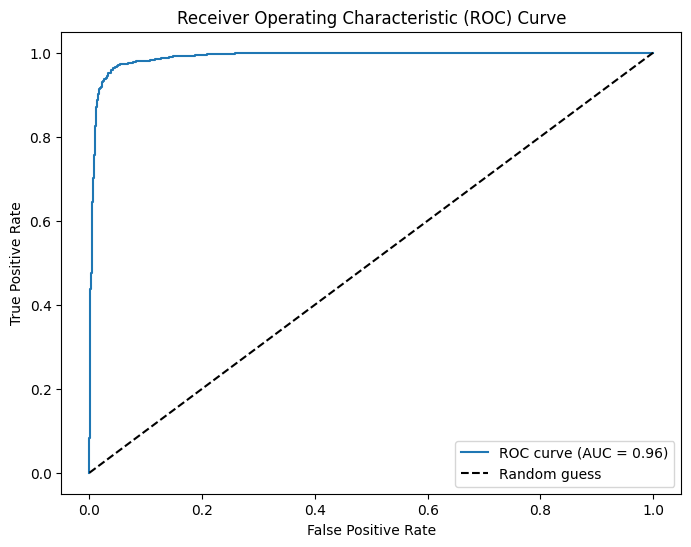

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the best model from model_comparator_feature_selec
best_model = model_comparator_feature_selec.best_model

# Ensure that the test set is not used in any part of the model training or hyperparameter tuning process
X_test = model_comparator_feature_selec.X_test
y_test = model_comparator_feature_selec.y_test

# Predict probabilities for the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, model_comparator_feature_selec.y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

This ROC curve demonstrates strong model performance, as indicated by the high AUC value of 0.96. The curve stays close to the top-left corner, which suggests that the model achieves a high true positive rate while maintaining a low false positive rate. This is indicative of excellent discriminatory power, meaning the model is effective at distinguishing between the positive and negative classes. The diagonal line represents a random guess (AUC = 0.5), and the model's curve significantly outperforms this baseline, showcasing its robustness and reliability in classification tasks.

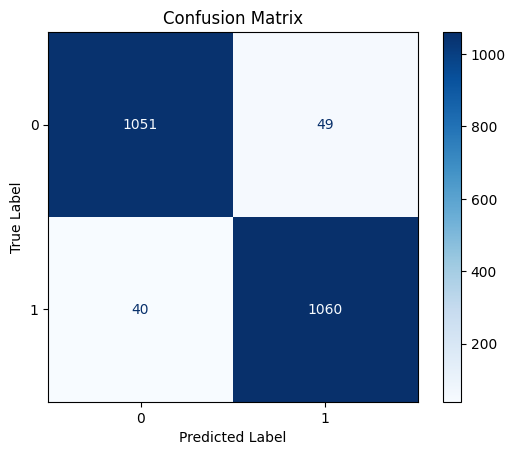

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1100
           1       0.96      0.96      0.96      1100

    accuracy                           0.96      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.96      0.96      0.96      2200



In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict probabilities for the test set, selecting only the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions (using a threshold of 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



The results from the confusion matrix and classification report reflect a highly effective model with balanced performance across both classes. The confusion matrix shows that the model accurately identifies most instances, with 1051 true negatives and 1060 true positives. There are relatively few misclassifications, including 49 false positives and 40 false negatives, indicating strong model precision and recall.

The classification report confirms this, with both classes achieving precision and recall scores of approximately 0.96. The F1-scores for both classes are also 0.96, highlighting a well-balanced performance where precision and recall are effectively aligned. An overall accuracy of 96% underscores the model's reliability and its capability to generalize well to the dataset.

These results suggest that the model is robust and capable of making accurate predictions with minimal misclassification, which is crucial for maintaining high performance in practical applications.

<a id='5.2'></a>
## 6.2. Ideas to improve the model

This is where you can put your extra analysis work. Try to keep it to one main idea. This will help your coursework grade, especially if makes the model work better ;-)

In [70]:
model_to_test = ['random_forest + xgboost + gradient_boosting']
model_comparator_feature_selec = modelComparator(new_feature_df)
model_comparator_feature_selec.compare_models(model_to_test, 10, 20)

{'Best Params': {'model__voting': 'soft', 'model__weights': [0, 0, 1], 'model__random_forest__n_estimators': 152, 'model__random_forest__max_depth': 28, 'model__random_forest__min_samples_split': 8, 'model__random_forest__min_samples_leaf': 2, 'model__random_forest__max_features': 'sqrt', 'model__random_forest__random_state': 42, 'model__xgboost__n_estimators': 450, 'model__xgboost__max_depth': 9, 'model__xgboost__learning_rate': 0.029613176100765387, 'model__xgboost__subsample': 0.7454774304857136, 'model__xgboost__colsample_bytree': 0.4510486359550511, 'model__xgboost__gamma': 3.0382370947747175, 'model__xgboost__min_child_weight': 9, 'model__xgboost__random_state': 42, 'model__gradient_boosting__n_estimators': 280, 'model__gradient_boosting__learning_rate': 0.04600377472285749, 'model__gradient_boosting__max_depth': 7, 'model__gradient_boosting__subsample': 0.7467202249915164, 'model__gradient_boosting__random_state': 42}, 'Recall': 0.9563636363636364, 'Precision': 0.916376306620209

,Best Params,Recall,Precision,Accuracy,F1 Score,AUC ROC,Model,Processing Time (s)
0,"{'model__voting': 'soft', 'model__weights': [0...",0.956364,0.916376,0.934545,0.935943,0.934545,random_forest + xgboost + gradient_boosting,3766.314621


The results show that while the ensemble voter classifier (combining random_forest, xgboost, and gradient_boosting) performed well, it was outshined by the standalone gradient_boosting model. The ensemble achieved strong metrics but required significant processing time (~3766 seconds). In contrast, gradient_boosting achieved better recall (0.963), precision (0.944), and F1 score (0.953) with a much shorter processing time (~885 seconds). This underscores that, in this case, the simpler gradient_boosting model was both more efficient and more effective than the complex ensemble approach.

In [85]:
model_to_test = ['gradient_boosting PCA']
model_comparator_feature_selec = modelComparator(feature_selec_df)
model_comparator_feature_selec.compare_models(model_to_test, 10, 25)

{'Best Params': {'model__n_estimators': 220, 'model__learning_rate': 0.018936332533954676, 'model__max_depth': 5, 'model__subsample': 0.6565243115041418, 'model__random_state': 42}, 'Recall': 0.9272727272727272, 'Precision': 0.796875, 'Accuracy': 0.8454545454545455, 'F1 Score': 0.8571428571428571, 'AUC ROC': 0.8454545454545455, 'Model': 'gradient_boosting PCA', 'Processing Time (s)': 1625.2171738147736}


,Best Params,Recall,Precision,Accuracy,F1 Score,AUC ROC,Model,Processing Time (s)
0,"{'model__n_estimators': 220, 'model__learning_...",0.927273,0.796875,0.845455,0.857143,0.845455,gradient_boosting PCA,1625.217174



Applying PCA (Principal Component Analysis) in this case resulted in a notable decline in the performance of the Gradient Boosting model. Initially, without PCA, the model achieved an impressive Accuracy of 0.959545 and an AUC ROC of 0.96. However, after applying PCA, the Accuracy dropped to 0.85 and the AUC ROC to 0.85.

This decline indicates that the transformation and dimensionality reduction introduced by PCA did not preserve the necessary information and relationships within the data that were critical for effective classification. While PCA can help reduce noise and computational complexity, it may also eliminate important variance and features that contribute to model performance, leading to suboptimal results. In this instance, the loss of key features likely hindered the model's ability to capture the underlying patterns in the dataset, resulting in reduced predictive capability and overall accuracy.

## Conclusion

The modeling process began with a comprehensive evaluation of several algorithms, yielding the following initial results for various models:

Gradient Boosting achieved an AUC ROC score of 0.87, while XGBoost reached an AUC ROC score of 0.86. Other models such as Random Forest and Logistic Regression showed similar performance metrics.
After implementing feature engineering, we observed significant improvements across the board. Specifically, Gradient Boosting improved its performance with an Accuracy of 0.94 and an AUC ROC score of 0.94. 

Focusing on Gradient Boosting, further feature selection yielded an even higher Accuracy of 0.96 and AUC ROC score of 0.96. This improvement confirmed the efficacy of narrowing down the feature set, leading to a model that effectively captured the underlying patterns in the data.

Subsequently, PCA was applied in an attempt to enhance dimensionality reduction, but this did not yield positive results, as the Accuracy and AUC ROC scores fell to 0.85 and 0.85, respectively. The application of PCA highlighted the importance of maintaining key features, as the transformation appeared to have removed critical information necessary for optimal classification.

In conclusion, the iterative process of feature engineering and selection demonstrated substantial gains in model performance, particularly for Gradient Boosting, which emerged as the top-performing algorithm. 